---
title: "svd"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---


In [1]:
#| code-summary: "import libraries"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
from scipy.stats import norm, ttest_ind, t
import scipy
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.animation import FuncAnimation, FFMpegWriter
# %load_ext manim

import os
%matplotlib widget

In [2]:
origin = np.array([0, 0, 0])
xhat = np.array([1, 0, 0])
yhat = np.array([0, 1, 0])
zhat = np.array([0, 0, 1])
ones = np.array([1, 1, 1])
x_data = np.array([1, 2, 3])
y_data = np.array([2, 2, 6])
lim = 6

intercept: -0.6666666666666665, slope: 2.0


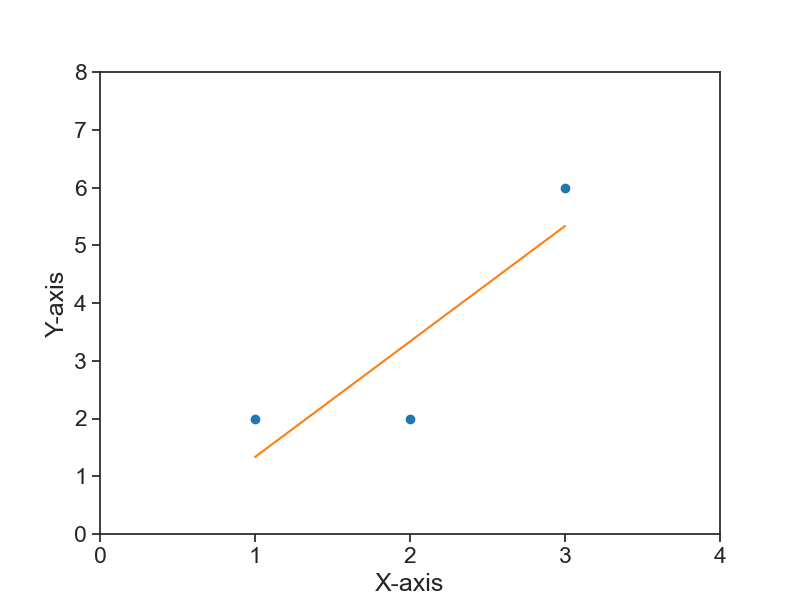

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.array([1, 2, 3])
y = np.array([2, 2, 6])


intercept = np.ones_like(x)

# linear regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
# plot the regression line
ax.plot(x, intercept + slope * x, color='tab:orange', label='Regression Line')

ax.plot(x, y, marker='o', linestyle='None', color='tab:blue')
ax.set(xlim=(0, 4),
       ylim=(0, 7),
       xticks=np.arange(0, 5, 1),
       yticks=np.arange(0, 9, 1),
       xlabel='X-axis',
       ylabel='Y-axis');

print(f"intercept: {intercept}, slope: {slope}")
y_hat = intercept*ones + slope * x_data

In [4]:
from tracemalloc import start


def draw_bounding_cube(ax):
    # define axis limits
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    zmin, zmax = ax.get_zlim()

    # define the 8 corners of the cube
    corners = [
        [xmin, ymin, zmin],
        [xmin, ymin, zmax],
        [xmin, ymax, zmin],
        [xmin, ymax, zmax],
        [xmax, ymin, zmin],
        [xmax, ymin, zmax],
        [xmax, ymax, zmin],
        [xmax, ymax, zmax],
    ]

    # define the 12 edges as pairs of corner indices
    edges = [
        (0, 1), (0, 2), (0, 4),
        (1, 3), (1, 5),
        (2, 3), (2, 6),
        (3, 7),
        (4, 5), (4, 6),
        (5, 7),
        (6, 7)
    ]

    # draw black lines along the cube edges
    for start, end in edges:
        x = [corners[start][0], corners[end][0]]
        y = [corners[start][1], corners[end][1]]
        z = [corners[start][2], corners[end][2]]
        ax.plot(x, y, z, color='black', linewidth=0.5)

def draw_projections(ax, vec):
    # draw dotted line from the tip of the column vector to the 3 planes
    # to xy-plane
    ax.plot([vec[0], vec[0]],
            [vec[1], vec[1]],
            [vec[2], 0], 
            linestyle='--', color='gray', linewidth=1)
    ax.plot([vec[0], 0],
            [vec[1], vec[1]],
            [vec[2], vec[2]], 
            linestyle='--', color='gray', linewidth=1)

def custom_quiver(ax, start, end, color='black'):
    direction = end - start
    #ax.quiver(*start, *direction, color='purple', linewidth=2)
    base_length=1.0
    base_ratio=0.3
    head_ratio = base_ratio * base_length / np.linalg.norm(direction)
    ax.quiver(*start, *direction, arrow_length_ratio=head_ratio, color=color, linewidth=2)

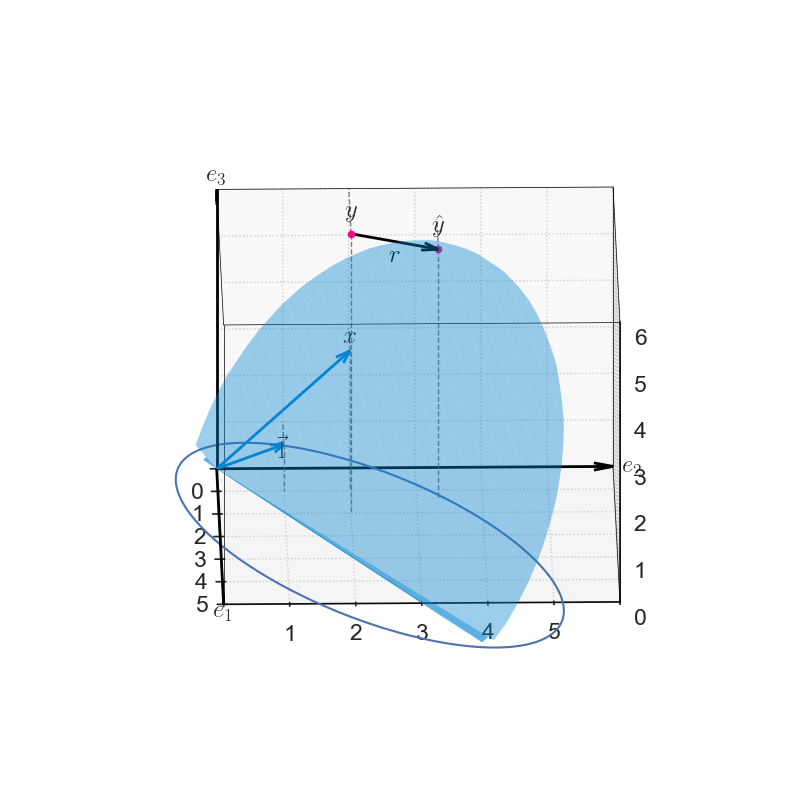

In [5]:
# 3d plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))
ax.set_proj_type('ortho')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.unicode_minus": False  # so LaTeX minus signs render correctly
})
# Draw an arrow along the x-axis

# draw the 3 axes
custom_quiver(ax, origin, 6*xhat, color='black')
custom_quiver(ax, origin, 6*yhat, color='black')
custom_quiver(ax, origin, 6*zhat, color='black')

# draw the two column vectors
col_vector_color = 'xkcd:cerulean'
custom_quiver(ax, origin, x_data, color=col_vector_color)
custom_quiver(ax, origin, ones, color=col_vector_color)
ax.text(x=x_data[0], y=x_data[1], z=x_data[2]+0.3, s=r'$x$', rotation=0, ha='center', va='center')
ax.text(x=ones[0]+0.3, y=ones[1], z=ones[2], s=r'$\vec{1}$', rotation=0, ha='center', va='center')

draw_projections(ax, x_data)
draw_projections(ax, ones)

ax.scatter(*y_data, color="xkcd:hot pink")
draw_projections(ax, y_data)
ax.scatter(*y_hat, color="xkcd:hot pink")
draw_projections(ax, y_hat)

ax.text(x=y_data[0], y=y_data[1], z=y_data[2]+0.5, s=r'$y$', rotation=0, ha='center', va='center')
ax.text(x=y_hat[0], y=y_hat[1], z=y_hat[2]+0.5, s=r'$\hat{y}$', rotation=0, ha='center', va='center')
# write "r" in between the two vectors
custom_quiver(ax, y_data, y_hat, color="black")
ax.text(x=(y_data[0] + y_hat[0]) / 2,
        y=(y_data[1] + y_hat[1]) / 2,
        z=(y_data[2] + y_hat[2]) / 2 - 0.3,
        s=r'$r$', rotation=0, ha='center', va='center', color='black')

ax.set(xlim3d=(0, lim),
       ylim3d=(0, lim),
       zlim3d=(0, lim),
       xticks=np.array([0,1,2,3,4,5,6]),
       yticks=np.array([0,1,2,3,4,5,6]),
       zticks=np.array([0,1,2,3,4,5,6]),
       xticklabels=[0,1,2,3,4,5, None],
       yticklabels=[None,1,2,3,4,5, None],
            )
draw_bounding_cube(ax)
ax.text(x=lim+0.3, y=0, z=0, s=r'$e_1$', rotation=0, ha='center', va='center')
ax.text(x=0, y=lim+0.3, z=0, s=r'$e_2$', rotation=0, ha='center', va='center')
ax.text(x=0, y=0, z=lim+0.3, s=r'$e_3$', rotation=0, ha='center', va='center')

ax.xaxis._axinfo["grid"]['linestyle'] = ':'
ax.yaxis._axinfo["grid"]['linestyle'] = ':'
ax.zaxis._axinfo["grid"]['linestyle'] = ':'

# plot plane defined by the two vectors
# compute u: normalize x
u = x_data / np.linalg.norm(x_data)
# remove component of ones in direction of u to make orthogonal vector in the plane
proj = np.dot(ones, u) * u
v_temp = ones - proj
# normalize to get v
v = v_temp / np.linalg.norm(v_temp)

# create meshgrid coefficients (s, t)
uv_lim = 10
# ratio = np.linalg.norm(x_data) / np.linalg.norm(ones)
u_vec = np.linspace(-uv_lim, uv_lim, 1000)
v_vec = np.linspace(-uv_lim, uv_lim, 1000)

U, V = np.meshgrid(u_vec, v_vec)
center_uv = np.array([3, 3])
radius_uv = 5
mask = (U - center_uv[0])**2 + (V - center_uv[1])**2 <= radius_uv**2
U_masked = np.where(mask, U, np.nan)
V_masked = np.where(mask, V, np.nan)

# compute coordinates of the plane points
X = U_masked * u[0] + V_masked * v[0]
Y = U_masked * u[1] + V_masked * v[1]
Z = U_masked * u[2] + V_masked * v[2]

maskZ = Z > 0
X = X * maskZ
Y = Y * maskZ
Z = Z * maskZ

# X = U_masked * ones[0] + V_masked * x_data[0]
# Y = U_masked * ones[1] + V_masked * x_data[1]
# Z = U_masked * ones[2] + V_masked * x_data[2]

# plot the masked surface
ax.plot_surface(X, Y, Z,
                alpha=0.4, color='xkcd:cerulean',
                edgecolor='none', shade=False)

# assume u, v are 3D unit vectors (shape (3,))
# center_uv is a 2-element list or array: [u_coord, v_coord]
# radius_uv is a scalar
theta = np.linspace(0, 2 * np.pi, 200)
# compute 3D center point
center = center_uv[0] * u + center_uv[1] * v
# compute 3D circle points
circle_points = np.array([
    center + radius_uv * (np.cos(t) * u + np.sin(t) * v)
    for t in theta
])  # shape (N, 3)
# plot the circle
# ax.plot(circle_points[:, 0], circle_points[:, 1], circle_points[:, 2], label='circle in (u,v)-plane')
ax.plot(circle_points[:, 0], circle_points[:, 1], 0*circle_points[:, 2], label='circle in (u,v)-plane')


ax.view_init(elev=20,  # elevation angle in degrees (up–down)
             azim=-25    # azimuth angle in degrees (left–right, around the z-axis)
             )

# fig.savefig("3dplot_C.png", dpi=300, bbox_inches='tight')
import os

# create output folder
os.makedirs("frames", exist_ok=True)

# loop over 360 degrees
for azim in range(360):
    ax.view_init(elev=20, azim=azim)
    fig.savefig(f"frames/frame_{azim:03d}.png", dpi=300, bbox_inches='tight')


In [6]:
with open("frames_list.txt", "w") as f:
    for _ in range(2):  # repeat twice
        for i in range(360):
            f.write(f"file 'frames/frame_{i:03d}.png'\n")

import subprocess

subprocess.run([
    "ffmpeg",
    "-f", "concat",
    "-safe", "0",
    "-r", "30",  # framerate
    "-i", "frames_list.txt",
    "-vf", "pad=ceil(iw/2)*2:ceil(ih/2)*2",
    "-c:v", "libx264",
    "-pix_fmt", "yuv420p",
    "3d_rotation_loop2x.mp4"
])

ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with clang version 18.1.8
  configuration: --prefix=/Users/yairmau/miniforge3/envs/olympus --cc=x86_64-apple-darwin13.4.0-clang --cxx=x86_64-apple-darwin13.4.0-clang++ --nm=x86_64-apple-darwin13.4.0-nm --ar=x86_64-apple-darwin13.4.0-ar --disable-doc --enable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-videotoolbox --disable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass --enable-pthreads --enable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libopus --enable-librsvg --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_1735647005464/_build_env/bin/pkg-config
  libavutil      59. 39.100 / 59. 39.100
  libavcodec     61. 19.100 / 6

CompletedProcess(args=['ffmpeg', '-f', 'concat', '-safe', '0', '-r', '30', '-i', 'frames_list.txt', '-vf', 'pad=ceil(iw/2)*2:ceil(ih/2)*2', '-c:v', 'libx264', '-pix_fmt', 'yuv420p', '3d_rotation_loop2x.mp4'], returncode=0)